<h1 align="center">Agglomerative Hierarchical Clustering for Eligibility Criteria Sentences</h1>

* Agglomerative Hierarchical Clustering with Python using Scipy and Scikit-learn package.
* We used the hierarchical agglomerative clustering algorithm, works in a “bottom-up” manner, to cluster established semantic feature matrix and generate clusters based on criteria sentences similarity.

In [1]:
import json
import csv

import pandas as pd # 0.24.2
import numpy as np # 1.18.5

from scipy.cluster import hierarchy # 1.4.1
from scipy.cluster.hierarchy import dendrogram # 1.4.1
from sklearn.cluster import AgglomerativeClustering # scikit-learn==0.23.2

import matplotlib.pyplot as plt #3.1.0
%matplotlib inline

<h2>Prepare feature matrix for clustering</h2>

In [2]:
data = pd.read_csv('./data/feature_matrix_data.csv')

In [3]:
print ("Shape of data: ", data.shape)
data.head(5)

Shape of data:  (19185, 127)


,aapp,acab,acty,aggp,amas,amph,anab,anim,anst,antb,...,shro,socb,sosy,spco,tisu,tmco,topp,virs,vita,vtbt
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0
3,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0


In [4]:
X = np.array(data)

<h2>Hierarchical clustering by scikit-learn</h2>

In [5]:
# n_clusters: it must be None if distance_threshold is not None
# affinity: euclidean,
# linkage: average uses the average of the distances of each observation of the two sets.
# distance_threshold: The linkage distance threshold above which, clusters will not be merged

model = AgglomerativeClustering(n_clusters=None, affinity="euclidean", linkage="average", distance_threshold=0.65)
clustering = model.fit(X)

In [6]:
print("The number of clusters found by the algorithm: {}".format(clustering.n_clusters_))

The number of clusters found by the algorithm: 301


In [7]:
data['cluster_'] = clustering.labels_
data.head(5)

,aapp,acab,acty,aggp,amas,amph,anab,anim,anst,antb,...,socb,sosy,spco,tisu,tmco,topp,virs,vita,vtbt,cluster_
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,29
2,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0,29
3,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,29
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,33
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,14


In [8]:
data.groupby(['cluster_'])['cluster_'].count()

cluster_
0         12
1        439
2          5
3        344
4         38
5          3
6         10
7         44
8        172
9         12
10        74
11        27
12       170
13       443
14       364
15        10
16       261
17         4
18        17
19         5
20        18
21         8
22      2065
23        47
24        78
25         9
26       239
27       190
28        34
29     10486
       ...  
271        1
272        1
273        1
274       16
275        1
276        1
277        1
278        1
279        1
280        1
281        1
282       13
283        1
284        1
285        1
286        2
287        1
288        1
289        1
290       12
291        1
292        2
293        1
294        1
295        4
296        1
297        3
298        9
299        2
300        1
Name: cluster_, Length: 301, dtype: int64

<h2>Plot hierarchical clustering dendrogram</h2>

[[1.12880000e+04 1.52920000e+04 0.00000000e+00 2.00000000e+00]
 [2.38300000e+03 6.16500000e+03 0.00000000e+00 2.00000000e+00]
 [7.53700000e+03 1.91860000e+04 0.00000000e+00 3.00000000e+00]
 ...
 [6.60500000e+03 3.83650000e+04 1.14534975e+00 1.91810000e+04]
 [8.70500000e+03 3.83660000e+04 1.14545154e+00 1.91820000e+04]
 [2.45770000e+04 3.83670000e+04 1.14550735e+00 1.91850000e+04]]


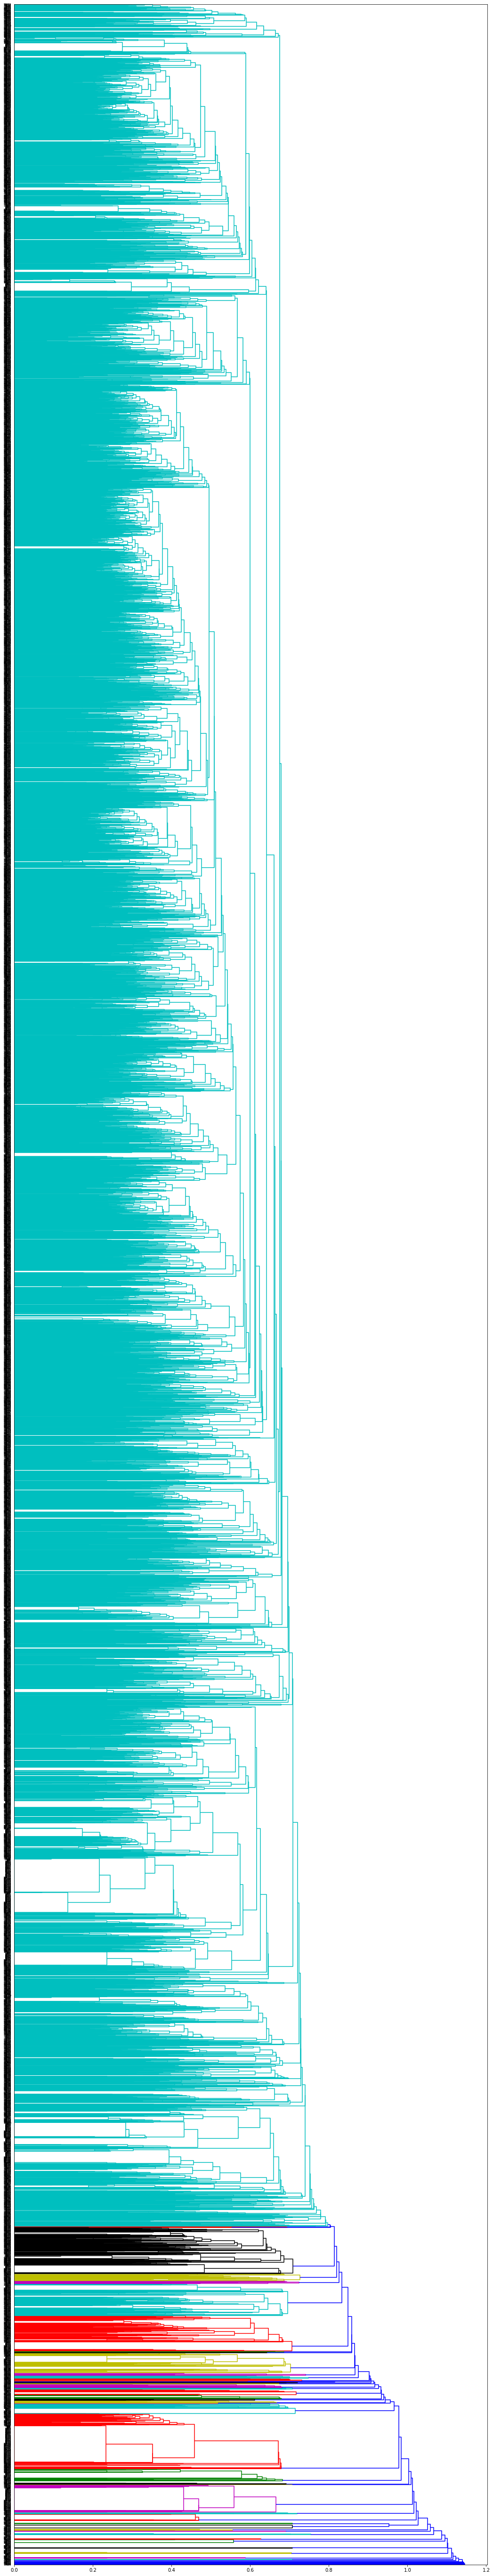

In [9]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # plot the top three levels of the dendrogram
    fig = plt.figure(figsize=(18,100))

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    print(linkage_matrix)
    # Plot the corresponding dendrogram
    # dendrogram(linkage_matrix, **kwargs)
    hierarchy.dendrogram(linkage_matrix, orientation = 'right')
    plt.show()

plot_dendrogram(clustering)

<h2>Output the results</h2>

In [10]:
clustering_results = []
with open("./data/criteria_sentences_preprocessed_metamap_filter(19185).json", "r", encoding="utf-8") as f:
    criteria_info = json.load(f)
    for criteria in criteria_info["criteria"]:
        no = int(criteria["No."])
        criteria_sentence = criteria["criteria_sentence"]
        cluster_ = data.loc[no, "cluster_"]
        
        clustering_results.append([cluster_, no, criteria_sentence])
clustering_results_sort = sorted(clustering_results, key=lambda x:x[0])

for i in clustering_results_sort:
    if i[0] == 16:
        print("Cluster: {}, ID: {}, sentence: {}".format(i[0], i[1], i[2].strip()))

Cluster: 16, ID: 7, sentence: ⑤知情同意，志愿受试。
Cluster: 16, ID: 206, sentence: 8)签署知情同意书。
Cluster: 16, ID: 349, sentence: 3, 签署知情同意书并能配合随访。
Cluster: 16, ID: 385, sentence: 3.未获得知情同意，拒绝参加的患者.
Cluster: 16, ID: 461, sentence: （3）拒绝签署知情同意书者。
Cluster: 16, ID: 518, sentence: 10.未签署知情同意书；
Cluster: 16, ID: 557, sentence: 1)签署知情同意书；
Cluster: 16, ID: 683, sentence: 4）签署知情同意书。
Cluster: 16, ID: 768, sentence: 3）签署知情同意书
Cluster: 16, ID: 886, sentence: 6、患者签署知情同意书
Cluster: 16, ID: 1013, sentence: (3) 知情同意并签署知情同意书者
Cluster: 16, ID: 1038, sentence: 未签署书面知情同意书
Cluster: 16, ID: 1060, sentence: ⑹ 不签署知情同意书者。
Cluster: 16, ID: 1068, sentence: 3)在研究开始前书写知情同意书的患者。
Cluster: 16, ID: 1147, sentence: 7. 患者或授权家属签署之情同事书
Cluster: 16, ID: 1185, sentence: （1）必须签署了知情同意；
Cluster: 16, ID: 1293, sentence: 2）围术期未签署知情同意者；
Cluster: 16, ID: 1355, sentence: 10.签署知情同意书。
Cluster: 16, ID: 1387, sentence: 7.签署书面知情同意书。
Cluster: 16, ID: 1430, sentence: 5. 签署知情同意书。
Cluster: 16, ID: 1455, sentence: 3)签署知情同意书者。
Cluster: 16, ID: 1605, senten

In [11]:
with open("./data/hierarchical_cluster_results.csv", "w", newline="", encoding="utf-8") as f:
    csv_writer = csv.writer(f)
    csv_writer.writerows(clustering_results_sort)